In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

---
#### Gradient Descent: The learning rate.
---

##### $g(x) = x^4 - 4x^2 + 5$

In [2]:
# function cost
def g(x):
    return pow(x, 4) - 4*pow(x, 2) + 5
# derivative of g(x)
def dg(x):
    return 4*pow(x, 3) - 8*x
# generate some data
x_1 = np.linspace(-2, 2, 1000)

---
##### *Gradient descent algorithm:*

In [3]:
def gradient_descent(deriv_func, init_guess, learn_rate=0.02, precision=0.0001, n_steps=1000):
    new_x = init_guess # random.uniform(-100, 100)
    # visualization variables
    x_list = [new_x]
    slope_list = [deriv_func(new_x)]
    
    for i in range(n_steps):
        prev_x = new_x # hold the value of previous iteration
        gradient = deriv_func(prev_x) # update the slope value
        new_x = prev_x - (learn_rate * gradient) # go one step further towards the minimun 
        
        #store data for visualization
        x_list.append(new_x)
        slope_list.append(deriv_func(new_x))
        
        # stop criteria
        x_variation = abs(new_x - prev_x) # check progress (step size)
        if x_variation < precision:
            break
    return new_x, x_list, slope_list

---
##### The learning rate parameter impacts directly the behaviour of our algorithm.
---
##### *If the learning rate is too large, the values may bounce around and the algorithm will never converge to the minimun cost:*

In [4]:
# learning_rate = 0.25 (default was 0.02)
new_x, x_list, deriv_list = gradient_descent(deriv_func=dg, init_guess= 0.5,
                                             learn_rate=0.25, n_steps=50)

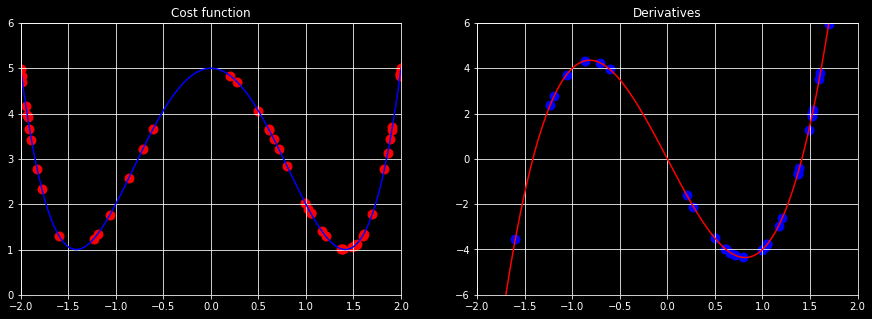

In [5]:
plt.style.use('dark_background')
plt.figure(figsize=[15, 5])
# cost function graph
plt.subplot(1, 2, 1).set_title('Cost function') #1row, 2cols, index=1
plt.xlim(-2, 2)
plt.ylim(0, 6)
plt.grid()
plt.scatter(x_list, g(np.array(x_list)), c='r', s=80)
plt.plot(x_1, g(x_1), c='b')
# derivative graph
plt.subplot(1, 2, 2).set_title('Derivatives') #1row, 2cols, index=2
plt.xlim(-2, 2)
plt.ylim(-6, 6)
plt.grid()
plt.scatter(x_list, deriv_list, c='b', s=80)
plt.plot(x_1, dg(x_1), c='r')

##### *If the learning rate is too small, it may take a huge amount of iterations to reach the minimun cost:*

In [6]:
steps = 100
low_gamma = gradient_descent(deriv_func=dg, init_guess= 3, 
                             learn_rate=0.0005, precision=0.0001, n_steps=steps)
mid_gamma = gradient_descent(deriv_func=dg, init_guess= 3, 
                             learn_rate=0.001, precision=0.0001, n_steps=steps)
high_gamma = gradient_descent(deriv_func=dg, init_guess= 3, 
                             learn_rate=0.002, precision=0.0001, n_steps=steps)
higher_gamma = gradient_descent(deriv_func=dg, init_guess= 2, 
                                learn_rate=0.2, precision=0.0001, n_steps=steps)

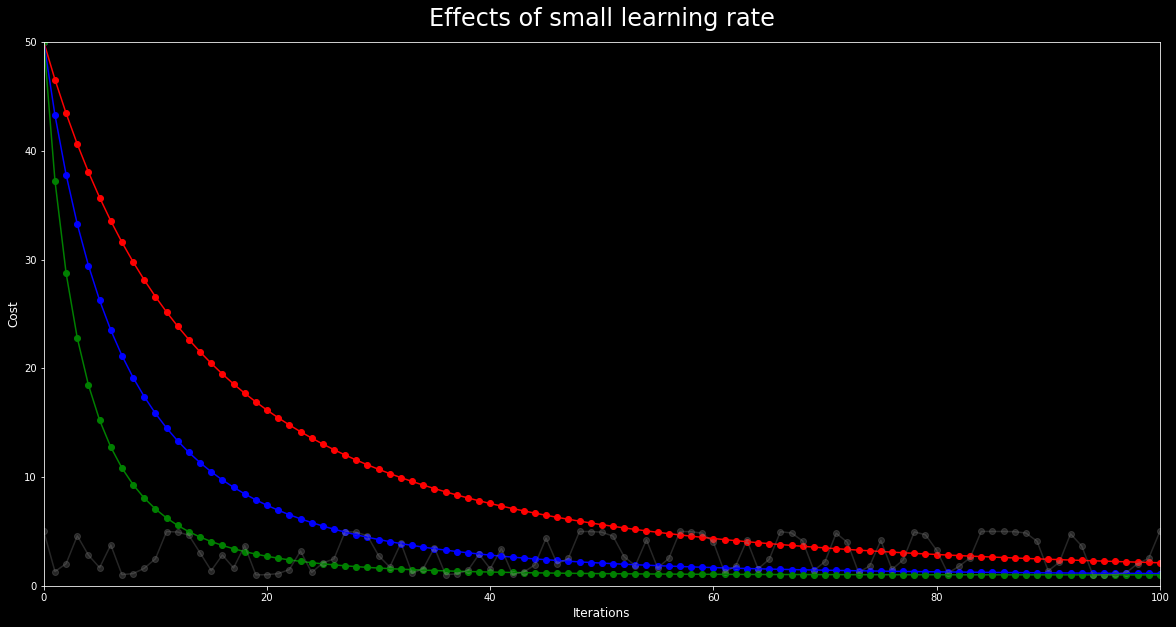

In [7]:
plt.figure(figsize=[20, 10])
plt.xlim(0, steps)
plt.ylim(0, 50)
plt.title('Effects of small learning rate', fontsize=24, pad=16)
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('Cost', fontsize=12)

#low_gamma
num_iterations = len(low_gamma[1])
iteration_list = list(range(0, num_iterations))
results_list = np.array(low_gamma[1]) 
plt.plot(iteration_list, g(results_list), c='r')
plt.scatter(iteration_list, g(results_list), c='r')

#mid_gamma
num_iterations = len(mid_gamma[1])
iteration_list = list(range(0, num_iterations))
results_list = np.array(mid_gamma[1]) 
plt.plot(iteration_list, g(results_list), c='b')
plt.scatter(iteration_list, g(results_list), c='b')

#high_gamma
num_iterations = len(high_gamma[1])
iteration_list = list(range(0, num_iterations))
results_list = np.array(high_gamma[1]) 
plt.plot(iteration_list, g(results_list), c='g')
plt.scatter(iteration_list, g(results_list), c='g')

#higher_gamma
num_iterations = len(higher_gamma[1])
iteration_list = list(range(0, num_iterations))
results_list = np.array(higher_gamma[1]) 
plt.plot(iteration_list, g(results_list), c='grey', alpha=0.3)
plt.scatter(iteration_list, g(results_list), c='grey', alpha=0.3)


##### *The graph above illustrates the need for a balance when picking the learning rate.*
##### *A low learning rate may lead to unnecessary effort to reach the objective and a high learning rate may not reach the objective at all.*
##### *The learning rate does not need to be static, there are a lot of techniques to optimize it dynamically.*
---